In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import dirname as up

In [2]:
pwd = os.getcwd()
_wd = up(os.getcwd())

os.chdir(_wd+'/Q_0.33_10keV/results/')
f_1       = [] #Store focal spots
angles_1  = [] #Store angles
maxvals_1 = [] #Store maximum value at each angle
sum_1     = [] #Store sum of focal spot array at each angle
for i in np.arange(0,50):
    angle = 0.1*i
    temp_ = np.load('foc_spot_Q_0.33_'+str(round(angle,2))+'_degree.npy',)
    angles_1.append(angle)
    f_1.append(temp_)
    maxvals_1.append(np.max(np.abs(temp_)))
    sum_1.append(np.sum(np.abs(temp_)**2))
    
os.chdir(_wd+'/Q_3.33_10keV/results/')
f_2       = [] #Store focal spots
angles_2  = [] #Store angles
maxvals_2 = [] #Store maximum value at each angle
sum_2     = [] #Store sum of focal spot array at each angle
for i in np.arange(0,50):
    angle = 0.1*i
    temp_ = np.load('foc_spot_Q_3.33_'+str(round(angle,2))+'_degree.npy',)
    angles_2.append(angle)
    f_2.append(temp_)
    maxvals_2.append(np.max(np.abs(temp_)))
    sum_2.append(np.sum(np.abs(temp_)**2))

os.chdir(pwd)

In [3]:
#input intensity
r = 29.438920457407793e-6
step_xy = 4.732213740458016e-9
n_pix = np.pi*r*r/(step_xy**2)
print(n_pix)

121580780.89931026


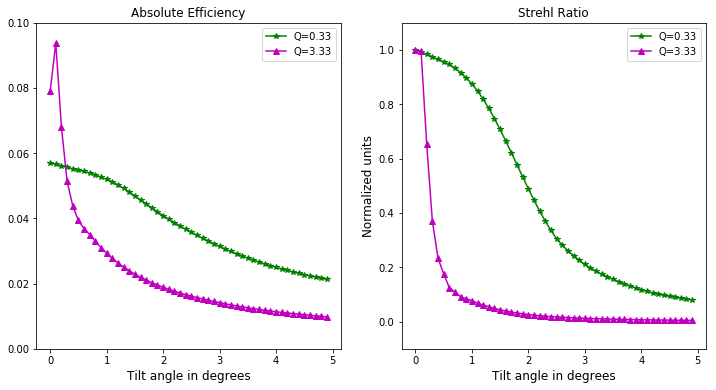

In [4]:
data_1 = np.abs(np.array(sum_1))
data_1 = data_1/n_pix
data_2 = np.abs(np.array(sum_2))
data_2 = data_2/n_pix

#_norm_ = 320000
_data_1 = np.abs(np.array(maxvals_1))**2
#_data_1 = _data_1/_norm_
_data_1 = _data_1/np.max(_data_1)
_data_2 = np.abs(np.array(maxvals_2))**2
#_data_2 = _data_2/_norm_
_data_2 = _data_2/np.max(_data_2)

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["figure.figsize"] = (12,6)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(angles_1,data_1,'g*-',label="Q=0.33")
ax1.plot(angles_2,data_2,'m^-',label="Q=3.33")
ax1.set_title("Absolute Efficiency",size=12)
ax1.set_ylabel("",size=12)
ax1.set_xlabel("Tilt angle in degrees",size=12)
ax1.set_ylim((0.0,0.1))
ax1.legend()
ax2.plot(angles_1,_data_1,'g*-',label="Q=0.33")
ax2.plot(angles_2,_data_2,'m^-',label="Q=3.33")
ax2.set_title("Strehl Ratio",size=12)
ax2.set_ylabel("Normalized units",size=12)
ax2.set_xlabel("Tilt angle in degrees",size=12)
ax2.set_ylim((-0.1,1.1))
ax2.legend()
plt.savefig("tilt_plot_ten.svg",format='svg',dpi=250)
plt.show()

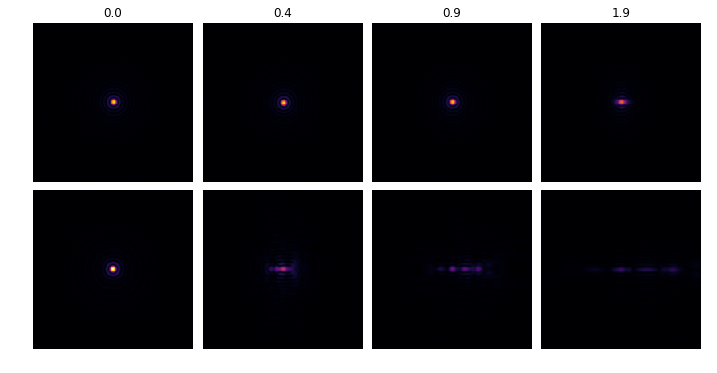

In [5]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["figure.figsize"] = (12,6)
fig,ax = plt.subplots(2,4)

N = 250
n = 100

max_plot_value = 565

ax[0,0].imshow(np.abs(f_1[0])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[0,0].axis('off')
ax[0,1].imshow(np.abs(f_1[4])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[0,1].axis('off')
ax[0,2].imshow(np.abs(f_1[9])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[0,2].axis('off')
ax[0,3].imshow(np.abs(f_1[19])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[0,3].axis('off')
ax[1,0].imshow(np.abs(f_2[0])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[1,0].axis('off')
ax[1,1].imshow(np.abs(f_2[4])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[1,1].axis('off')
ax[1,2].imshow(np.abs(f_2[9])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[1,2].axis('off')
ax[1,3].imshow(np.abs(f_2[19])[N-n:N+n,N-n:N+n],cmap='inferno',vmin = 0,vmax = max_plot_value)
ax[1,3].axis('off')

ax[0,0].set_title(round(angles_1[0],2))
ax[0,1].set_title(round(angles_1[4],2))
ax[0,2].set_title(round(angles_1[9],2))
ax[0,3].set_title(round(angles_1[19],2))

fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.05)

plt.savefig("foc_spot_ten.svg",format='svg',dpi=250)

plt.show()